In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv("data/factory_sensor_simulator_2040.csv")
display(df.head())

,Machine_ID,Machine_Type,Installation_Year,Operational_Hours,Temperature_C,Vibration_mms,Sound_dB,Oil_Level_pct,Coolant_Level_pct,Power_Consumption_kW,...,Failure_History_Count,AI_Supervision,Error_Codes_Last_30_Days,Remaining_Useful_Life_days,Failure_Within_7_Days,Laser_Intensity,Hydraulic_Pressure_bar,Coolant_Flow_L_min,Heat_Index,AI_Override_Events
0,MC_000000,Mixer,2027,81769,73.43,12.78,83.72,36.76,68.74,84.95,...,5,True,3,162.0,False,NaN,NaN,NaN,NaN,2
1,MC_000001,Industrial_Chiller,2032,74966,58.32,14.99,77.04,100.00,62.13,154.61,...,2,True,4,147.0,False,NaN,NaN,40.92,NaN,2
2,MC_000002,Pick_and_Place,2003,94006,49.63,23.78,69.08,42.96,35.96,51.90,...,1,True,6,0.0,True,NaN,NaN,NaN,NaN,2
3,MC_000003,Vision_System,2007,76637,63.73,12.38,85.58,94.90,48.94,75.61,...,1,False,4,161.0,False,NaN,NaN,NaN,NaN,0
4,MC_000004,Shuttle_System,2016,20870,42.77,4.42,96.72,47.56,53.78,224.93,...,2,False,1,765.0,False,NaN,NaN,NaN,NaN,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Machine_ID                  500000 non-null  object 
 1   Machine_Type                500000 non-null  object 
 2   Installation_Year           500000 non-null  int64  
 3   Operational_Hours           500000 non-null  int64  
 4   Temperature_C               500000 non-null  float64
 5   Vibration_mms               500000 non-null  float64
 6   Sound_dB                    500000 non-null  float64
 7   Oil_Level_pct               500000 non-null  float64
 8   Coolant_Level_pct           500000 non-null  float64
 9   Power_Consumption_kW        500000 non-null  float64
 10  Last_Maintenance_Days_Ago   500000 non-null  int64  
 11  Maintenance_History_Count   500000 non-null  int64  
 12  Failure_History_Count       500000 non-null  int64  
 13  AI_Supervision

In [19]:
null = df.isnull().sum()
print(f"Missing values:\n\n{null}")

Missing values:

Machine_ID                         0
Machine_Type                       0
Installation_Year                  0
Operational_Hours                  0
Temperature_C                      0
Vibration_mms                      0
Sound_dB                           0
Oil_Level_pct                      0
Coolant_Level_pct                  0
Power_Consumption_kW               0
Last_Maintenance_Days_Ago          0
Maintenance_History_Count          0
Failure_History_Count              0
AI_Supervision                     0
Error_Codes_Last_30_Days           0
Remaining_Useful_Life_days         0
Failure_Within_7_Days              0
Laser_Intensity               484844
Hydraulic_Pressure_bar        469660
Coolant_Flow_L_min            454376
Heat_Index                    454786
AI_Override_Events                 0
dtype: int64


In [20]:
duplicates = df.duplicated().sum()
print(f"Duplicated data: {duplicates}")

Duplicated data: 0


In [21]:
print(f"Number of unique values per column")
df.nunique()

Number of unique values per column


Machine_ID                    500000
Machine_Type                      33
Installation_Year                 41
Operational_Hours              99328
Temperature_C                   9878
Vibration_mms                   3604
Sound_dB                        6806
Oil_Level_pct                   9275
Coolant_Level_pct               9984
Power_Consumption_kW           43440
Last_Maintenance_Days_Ago        366
Maintenance_History_Count         19
Failure_History_Count             13
AI_Supervision                     2
Error_Codes_Last_30_Days          14
Remaining_Useful_Life_days      1106
Failure_Within_7_Days              2
Laser_Intensity                 4247
Hydraulic_Pressure_bar          6766
Coolant_Flow_L_min              5172
Heat_Index                     17980
AI_Override_Events                12
dtype: int64

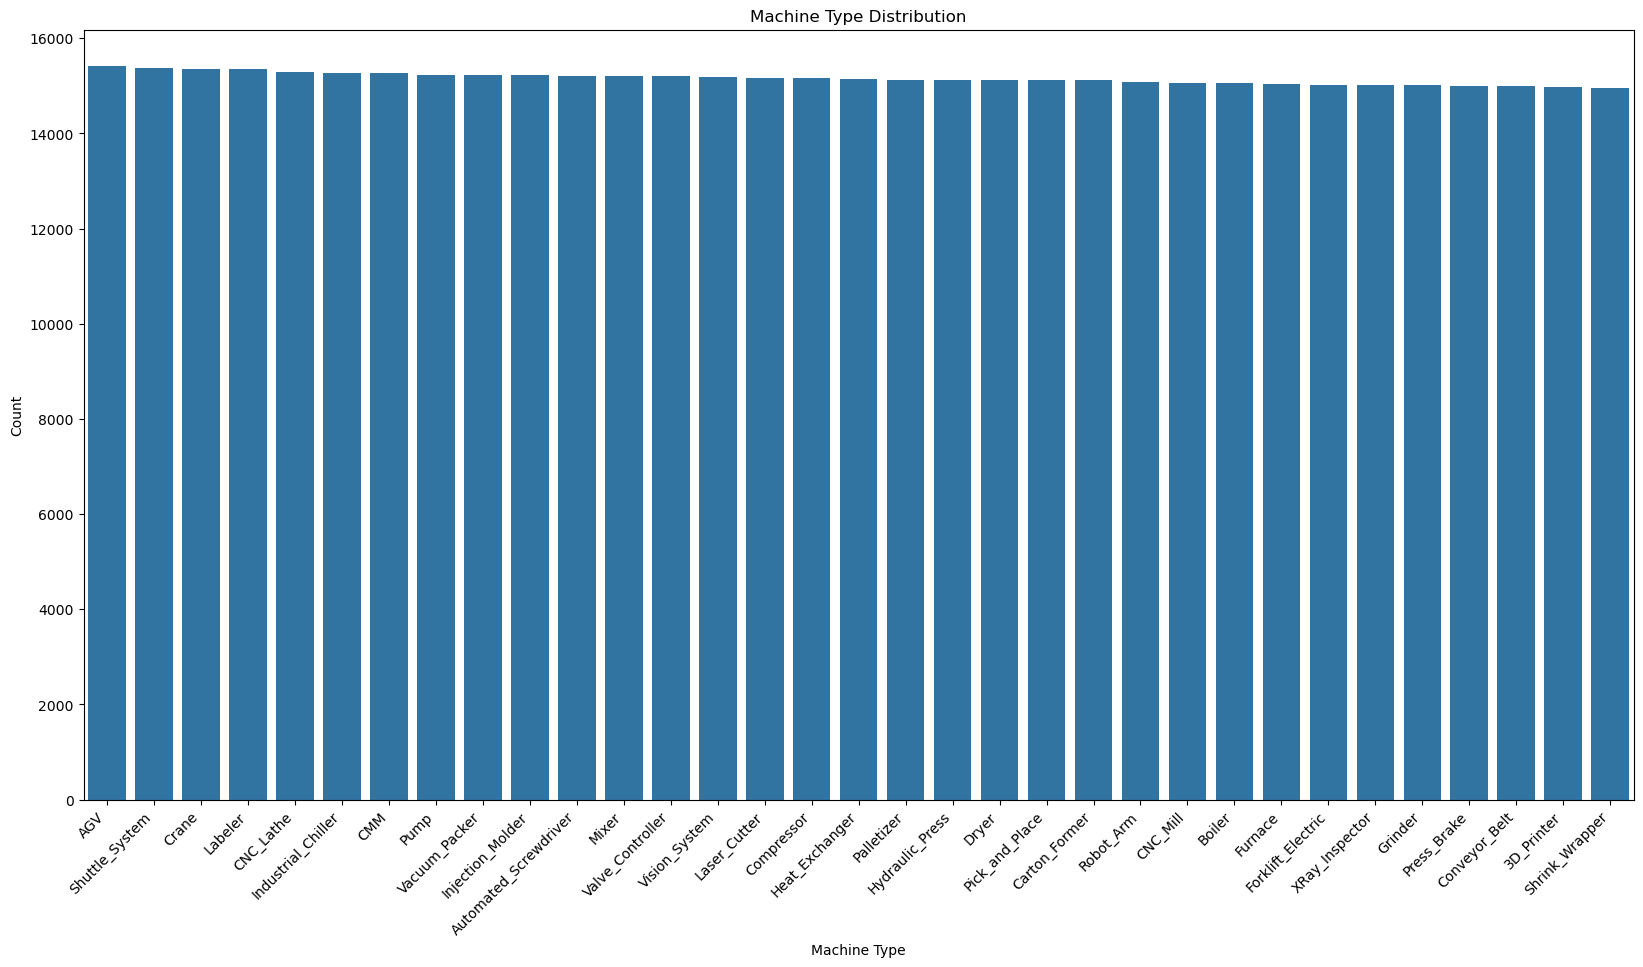

In [22]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Machine_Type', data=df, order=df['Machine_Type'].value_counts().index)
plt.title('Machine Type Distribution')
plt.xlabel('Machine Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Count')
plt.show()

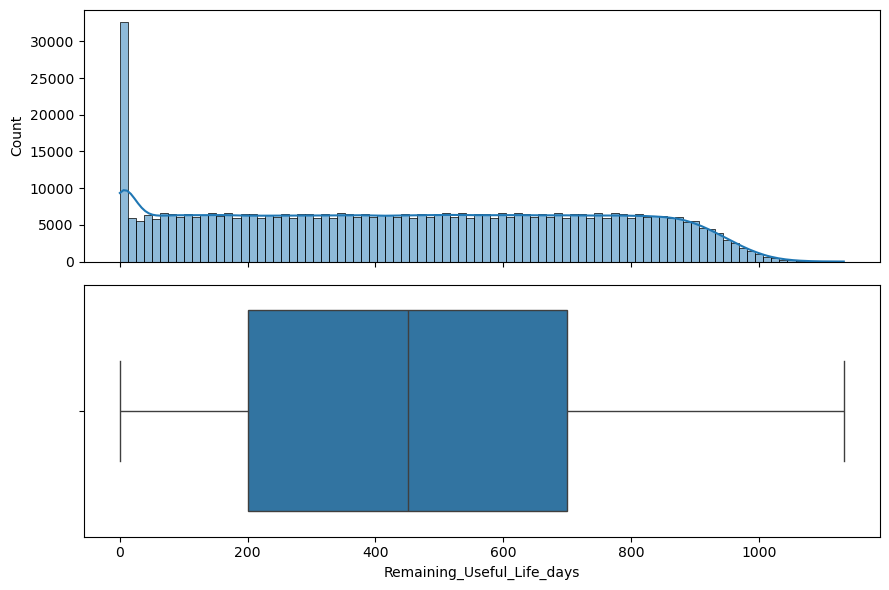

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(9, 6), sharex=True) 

# Histogram with KDE
sns.histplot(data=df, x='Remaining_Useful_Life_days', kde=True, ax=axes[0])

# Boxplot
sns.boxplot(data=df, x='Remaining_Useful_Life_days', ax=axes[1])

plt.tight_layout()
plt.show()